# This is the code notebook

In [20]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import pickle

from ode_system import ODESystem
from waste_water_simulator import WasteWaterSimulator

 # Getting mi_max

## Summer

In [21]:
scenario_name = 'Optimistic Summer'
irradiance_superfitial = 934  # umol/m2s fonte:
temperature = 32   # C - fonte: https://weather.com/weather/monthly/l/5207c9dc43cb29d6a2b220fa6eb54e55620f4562ad1a5679ef3f36812c05a4f2

## winter

In [22]:
scenario_name = 'Optimistic winter'
irradiance_superfitial = 393  # umol/m2s fonte da propoção: http://www.cresesb.cepel.br/index.php?section=sundata
temperature = 16   # C - fonte: https://weather.com/weather/monthly/l/5207c9dc43cb29d6a2b220fa6eb54e55620f4562ad1a5679ef3f36812c05a4f2

## medium expected conditions

In [23]:
# Duration
hidraulic_retention_period_days = 20
time = np.arange(0, hidraulic_retention_period_days, 0.6)

In [24]:
# algae
algae_initial_concentration = 0.003322  # uM/m^3

In [25]:
# substrate
pet_initial_concentration = 680  # mg/m3 - testar também do artigo da najua (https://www.prp.unicamp.br/inscricao-congresso/resumos/2022P19510A36866O4734.pdf) e uma revisão (2021) tbm https://www.revistas.unam.mx/index.php/aidis/article/view/75496
mhet_initial_concentration = 0

In [26]:
# nutrients
amonium_concentration = 30900
nitrate_concentration = 400
phosphate_phosphorum_concentration = 119200

In [27]:
# enviroment
medium_ph = 7.8
dissolved_o2 = 0
bicarbonate_concentration = 20000
co2_concentration = 1600

In [28]:
# putting it all togheter
petase_concentration, mhetase_concentration = [0,0]
dependents = [
    algae_initial_concentration,
    petase_concentration,
    mhetase_concentration,
    pet_initial_concentration,
    mhet_initial_concentration,
    ]
variable_independents = [
    irradiance_superfitial,
    temperature,
    ]
fixed_independents = [
    medium_ph,
    dissolved_o2,
    co2_concentration,
    bicarbonate_concentration,
    nitrate_concentration,
    amonium_concentration,
    phosphate_phosphorum_concentration,
    ]

ode_system = ODESystem()

results = odeint(ode_system.ode_system, y0=dependents, t= time, args=(variable_independents, fixed_independents))
zip(results)
result_algae_concentration, result_petase_concentration, result_mhetase_concentration, result_pet_concentration, result_mhet_concentration = list(zip(*results))

In [29]:
# Save this model
args = [fixed_independents, variable_independents]
inputs = {'y0':dependents, 'args': args}
obj = {'inputs': inputs, 'model': results }
with open(f'scenarios/{scenario_name}.p', mode='wb') as file:
    pickle.dump(obj, file)

# Simulation

In [30]:
time_array = np.arange(0, 21, 1)

## Scenario one - Summer

In [31]:
Cx0 = 0.000003322
mi_max = 1.64
scenario = WasteWaterSimulator(Cx0, time_array, mi_max)
scenario.simulate(460)


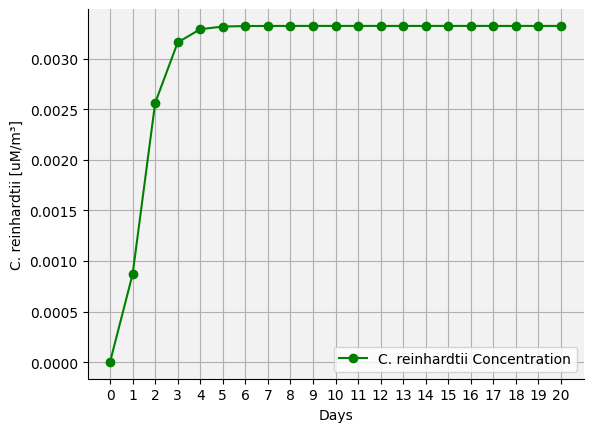

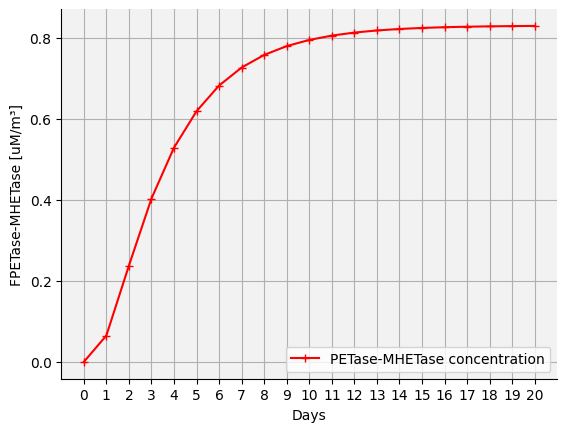

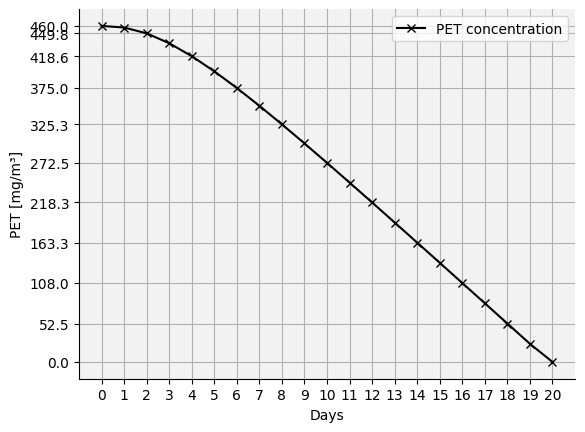

In [32]:
title = 'summer simulation'
scenario.plot_algae(title)
scenario.plot_enzyme(title)
scenario.plot_PET(title)

In [33]:
print(scenario.Cx0)
scenario.algae_concentration

3.322e-06


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000003,0.00087,0.002562,0.003159,0.00329,0.003316,0.003321,0.003322,0.003322,0.003322,...,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322
1,0.000000,1.00000,2.000000,3.000000,4.00000,5.000000,6.000000,7.000000,8.000000,9.000000,...,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000


## Scenario two - winter

In [34]:
Cx0 = 0.0000003322
mi_max = -0.039
winter_scenario = WasteWaterSimulator(Cx0, time_array, mi_max)
winter_scenario.simulate(460)

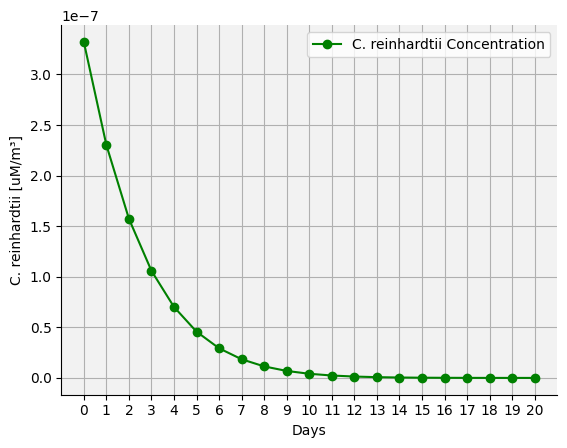

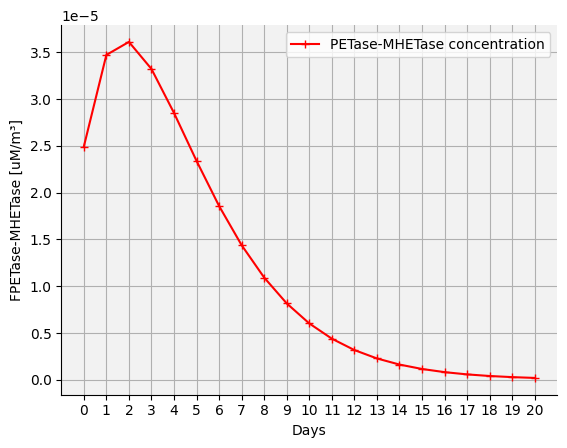

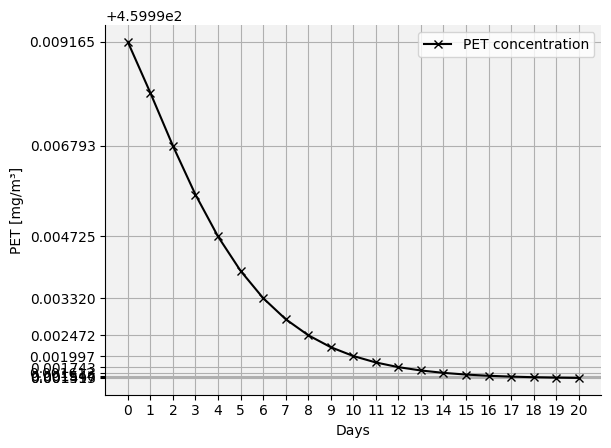

In [35]:
title = 'winter simulation '
winter_scenario.plot_algae(title)
winter_scenario.plot_enzyme(title)
winter_scenario.plot_PET(title)

In [36]:
scenario.enzyme_production()

5.2232108342825755e-17